# Immo Eliza - Cleaning data - BeCode Project

In [144]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [145]:
df = pd.read_csv('all_data_frame.csv')

/var/folders/rl/70187qg15jqf1pwjg83vbsqw0000gn/T/ipykernel_65149/4141452443.py:1: DtypeWarning: Columns (24,25,26,27,72,73,74,75,106,115,123) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('all_data_frame.csv')


In [146]:
df.head()

,Available as of,Available date,Construction year,Building condition,Street frontage width,Number of frontages,Surroundings type,Virtual visit,Living area,Living room surface,...,Current monthly revenue,Percentage rented,Venue of the sale,Single session,Terms of visit,Starting price,EPC description,Sea view,Floor,Number of floors
0,After signing the deed,November 12 2022 - 12:00 AM,1899.0,Good,5 m,2.0,Isolated,Link to the virtual visit,122 m² square meters,14 m² square meters,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,After signing the deed,September 15 2022 - 12:00 AM,1941.0,Good,4.44 m,2.0,Urban,NaN,119 m² square meters,32 m² square meters,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,After signing the deed,NaN,1961.0,To renovate,7 m,3.0,"Living area (residential, urban or rural)",NaN,200 m² square meters,45 m² square meters,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,After signing the deed,NaN,1989.0,As new,12 m,4.0,Landscape,NaN,404 m² square meters,55 m² square meters,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Depending on the tenant,NaN,1924.0,To be done up,7 m,2.0,NaN,Link to the virtual visit,350 m² square meters,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
list(df.columns)

['Available as of',
 'Available date',
 'Construction year',
 'Building condition',
 'Street frontage width',
 'Number of frontages',
 'Surroundings type',
 'Virtual visit',
 'Living area',
 'Living room surface',
 'Dining room',
 'Kitchen type',
 'Kitchen surface',
 'Bedrooms',
 'Bedroom 1 surface',
 'Bedroom 2 surface',
 'Bathrooms',
 'Shower rooms',
 'Toilets',
 'Office surface',
 'Office',
 'Basement',
 'Attic',
 'Furnished',
 'Surface of the plot',
 'Width of the lot on the street',
 'Connection to sewer network',
 'Gas, water &amp; electricity',
 'Garden surface',
 'Terrace surface',
 'Elevator',
 'Accessible for disabled people',
 'TV cable',
 'Swimming pool',
 'Primary energy consumption',
 'Energy class',
 'Unnamed: 36',
 'Reference number of the EPC report',
 'CO₂ emission',
 'Yearly theoretical total energy consumption',
 'Heating type',
 'Double glazing',
 'Planning permission obtained',
 'Total ground floor buildable',
 'Subdivision permit',
 'Possible priority purchase ri

The output must be: 
    "area": int,
    "property-type": "APARTMENT" | "HOUSE" | "OTHERS",
    "rooms-number": int,
    "zip-code": int,
    "land-area": Optional[int],
    "garden": Optional[bool],
    "garden-area": Optional[int],
    "equipped-kitchen": Optional[bool],
    "full-address": Optional[str],
    "swimming-pool": Optional[bool],
    "furnished": Optional[bool],
    "open-fire": Optional[bool],
    "terrace": Optional[bool],
    "terrace-area": Optional[int],
    "facades-number": Optional[int],
    "building-state": Optional[
      "NEW" | "GOOD" | "TO RENOVATE" | "JUST RENOVATED" | "TO REBUILD"]

# Data Wrangling

In [148]:
#select columns
df = df[['url',
         'Price',
         'Living area',
         'type_of_property',
         'Bedrooms',
         'zip_code',
         'Surface of the plot',
         'Garden',
         'Garden surface',
         'Kitchen type',
         'locality',
         'Swimming pool',
         'Furnished',
         'How many fireplaces?',
         'Terrace',
         'Terrace surface',
         'Number of frontages',
         'Building condition']]

In [149]:
print("Rows     : ", df.shape[0])
print("Columns  : ", df.shape[1])
print("\nFeatures : \n", df.columns.tolist())
print("\nMissing values :  ", df.isnull().sum().values.sum())
print("\nUnique values :  \n", df.nunique())

print("df", df.shape)


Rows     :  18479
Columns  :  18

Features : 
 ['url', 'Price', 'Living area', 'type_of_property', 'Bedrooms', 'zip_code', 'Surface of the plot', 'Garden', 'Garden surface', 'Kitchen type', 'locality', 'Swimming pool', 'Furnished', 'How many fireplaces?', 'Terrace', 'Terrace surface', 'Number of frontages', 'Building condition']

Missing values :   111393

Unique values :  
 url                     17373
Price                    1841
Living area               670
type_of_property            3
Bedrooms                   26
zip_code                  891
Surface of the plot      2219
Garden                      1
Garden surface            903
Kitchen type                8
locality                 1860
Swimming pool               2
Furnished                   2
How many fireplaces?        8
Terrace                     1
Terrace surface           177
Number of frontages         7
Building condition          6
dtype: int64
df (18479, 18)


In [150]:
#info point
def give_info(data):

    info = (pd.concat([data.dtypes,
                   data.nunique(),
                   data.isnull().sum(),
                   data.isnull().sum()*100/len(data)],axis=1))
    info = info.rename(columns={0:'Data types',
                            1:'Uniques values', # amount of possible values , 'cardinality' of variable
                            2:'Number of null Values',
                            3:'Percentage of null values'}) # amount of null values

    return info

give_info(df)

,Data types,Uniques values,Number of null Values,Percentage of null values
url,object,17373,0,0.000000
Price,object,1841,633,3.425510
Living area,object,670,1374,7.435467
type_of_property,object,3,0,0.000000
Bedrooms,float64,26,402,2.175442
zip_code,int64,891,0,0.000000
Surface of the plot,object,2219,9508,51.453001
Garden,object,1,16266,88.024244
Garden surface,object,903,14121,76.416473
Kitchen type,object,8,4671,25.277342


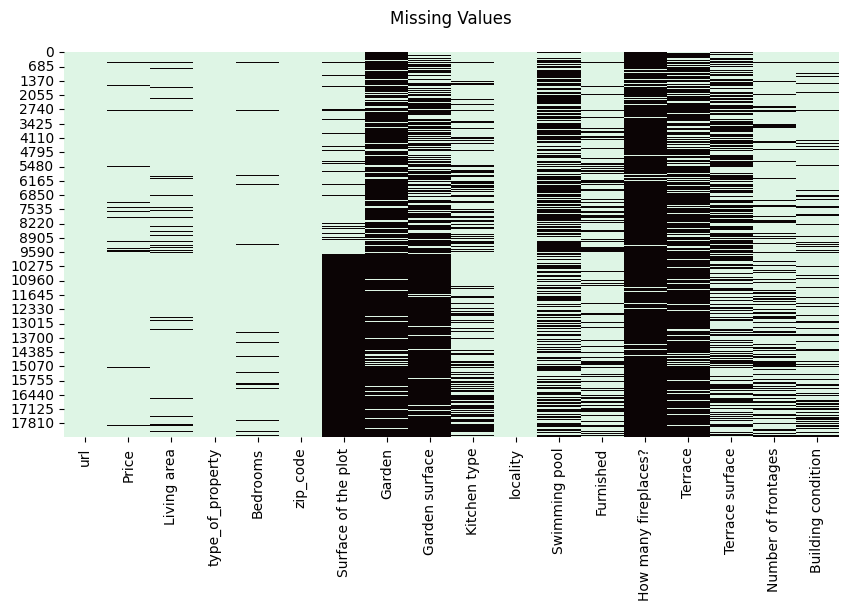

In [151]:
plt.figure(figsize=(10, 5))
plt.title('Missing Values\n')
sns.heatmap(df.notnull(), cbar=False, cmap = 'mako')
plt.show()
#black lines are missing values

In [152]:
df.columns = df.columns.str.replace(' ','_') #proprer call columns
df.columns= df.columns.str.lower() #lower case columns names
list(df.columns)

['url',
 'price',
 'living_area',
 'type_of_property',
 'bedrooms',
 'zip_code',
 'surface_of_the_plot',
 'garden',
 'garden_surface',
 'kitchen_type',
 'locality',
 'swimming_pool',
 'furnished',
 'how_many_fireplaces?',
 'terrace',
 'terrace_surface',
 'number_of_frontages',
 'building_condition']

 ## ID

In [153]:
#create ID in the new datframe (from the URL)
df["id"] = df["url"].str.split("/").str[9]
df["id"] = df["id"].apply(lambda x: str(x).split('?')).str[0]
#print(df["id"])
print("ID Unique Values:", df["id"].nunique())
print("Total ID:" , df["id"].count())
print("Duplicates: ", df["id"].count() - df["id"].nunique())

ID Unique Values: 17373
Total ID: 18479
Duplicates:  1106


In [154]:
df = df.drop_duplicates(subset="id")
df.shape
give_info(df)

,Data types,Uniques values,Number of null Values,Percentage of null values
url,object,17373,0,0.000000
price,object,1841,602,3.465147
living_area,object,670,1311,7.546192
type_of_property,object,3,0,0.000000
bedrooms,float64,26,373,2.147010
zip_code,int64,891,0,0.000000
surface_of_the_plot,object,2219,8755,50.394290
garden,object,1,15265,87.866229
garden_surface,object,903,13204,76.002993
kitchen_type,object,8,4424,25.464802


## Area

In [155]:
# 'area'
df["living_area"] = df["living_area"].str.split(" ").str[0]
df['living_area'] = df['living_area'].astype(float) #in square_meters
df = df.dropna(subset="living_area") 
df['area'] = df['living_area'].astype(int)



In [156]:
df['area'] = df['living_area'].astype(int)

In [157]:
df['living_area'] = df['living_area'].astype(int)

## Surface of the plot

In [158]:
#land_area
df["surface_of_the_plot"] = df["surface_of_the_plot"].str.split(" ").str[0]
df['land_area'] = df["surface_of_the_plot"]
df['land_area']= df['land_area'].fillna(df.pop('area'))
df['land_area'] = df['land_area'].astype(int)

## Type of Property

In [159]:
#Type of Property
df['type_of_property'].unique()
df['property_type'] = df['type_of_property']
df['property_type'].value_counts()
df['property_type'] = df['property_type'].astype(str)

## Number of rooms  


In [160]:
#rooms-number
df = df.dropna(subset='bedrooms') 
df["rooms-number"] = df['bedrooms'].astype(int)
df["rooms-number"].value_counts()



2     4930
3     4789
4     2421
1     1677
5     1082
6      481
7      174
8       84
9       56
10      33
11      10
14       9
12       9
16       6
13       5
15       5
20       2
17       2
34       1
25       1
23       1
22       1
26       1
19       1
Name: rooms-number, dtype: int64

 ## Zip-Code

In [161]:
df_code = pd.read_excel('zipcode_be.xlsx') #data with zipcode, ville names, latitude and longitude

In [162]:
df_code.head()

,code,name,lat,lng,province,region
0,1000,Bruxelles,508427501,43515499,Vlaams-Brabant,Brussels
1,1020,Laeken,508842180,43580002,Vlaams-Brabant,Brussels
2,1030,Schaerbeek,508674400,43772700,Vlaams-Brabant,Brussels
3,1040,Etterbeek,508325900,43889900,Vlaams-Brabant,Brussels
4,1050,Ixelles,508270563,43723080,Vlaams-Brabant,Brussels


In [163]:
df_code['code']=df_code['code'].astype(int)
df['code'] = df['zip_code'].astype(int)

In [164]:
df = df.merge(df_code, on='code', how='left')
df = df.drop_duplicates(subset="id")

In [165]:
df = df.dropna(subset="name")

In [166]:
df['full_address'] =  df['locality']
df['full_address'] = df['full_address'].astype(str)

## Garden 

In [167]:
#"garden": Optional[bool],
#"garden-area": Optional[int],
df['garden_area'] = df['garden_surface'].str.split(" ").str[0]
df['garden_area'] = df['garden_area'].fillna(0)
df['garden_area'] = df['garden_area'].astype(int) #in square_meters


In [168]:
#garden (yes = 1 / no = 0)
garden = []
for value in df['garden_area']:
    if value > 0.0:
        garden.append(1)
    elif value == 0:
        garden.append(0)

df['garden'] = garden


## Equipped kitchen

In [169]:
#equipped-kitchen: Optional[bool],
pd.unique(df['kitchen_type'])

array(['Semi equipped', 'USA installed', 'Installed', 'Hyper equipped',
       'Not installed', 'USA semi equipped', 'USA hyper equipped', nan,
       'USA uninstalled'], dtype=object)

In [170]:
kitchen_full = [] #(yes = 1 / no = 2)
for value in df['kitchen_type']:
    if value == 'Not installed':
        kitchen_full.append(0)
    elif value == 'Semi equipped':
        kitchen_full.append(1)
    elif value == 'USA semi equipped':
        kitchen_full.append(1)
    elif value == 'Installed':
        kitchen_full.append(1)
    elif value == 'Hyper equipped':
        kitchen_full.append(1)
    elif value == 'USA installed':
        kitchen_full.append(1)
    elif value == 'USA hyper equippe':
        kitchen_full.append(1)
    else: #including null value
        kitchen_full.append(0)


df["equipped-kitchen"] = kitchen_full
print("Kitchen type: \n", df['kitchen_type'], "\n Equipped-kitchen: \n", df['equipped-kitchen'])


Kitchen type: 
 0         Semi equipped
1         USA installed
2             Installed
3        Hyper equipped
6             Installed
              ...      
43048               NaN
43056         Installed
43058         Installed
43060         Installed
43062               NaN
Name: kitchen_type, Length: 15770, dtype: object 
 Equipped-kitchen: 
 0        1
1        1
2        1
3        1
6        1
        ..
43048    0
43056    1
43058    1
43060    1
43062    0
Name: equipped-kitchen, Length: 15770, dtype: int64


## Swimming pool

In [171]:

#swimming_pool: Optional[bool],
df['swimming_pool'].unique()

#null is no swimming pool??? if yes:
df['swimming_pool'] = df['swimming_pool'].fillna(0)
df['swimming_pool'] = (df['swimming_pool']).replace({'No':0, 'Yes':1})
df['swimming_pool']


0        0
1        0
2        0
3        0
6        0
        ..
43048    0
43056    0
43058    0
43060    0
43062    0
Name: swimming_pool, Length: 15770, dtype: int64

## Furnished 

In [172]:
#furnished : Optional[bool]
print( df['furnished'].value_counts() , df['furnished'].unique())

No     11904
Yes      442
Name: furnished, dtype: int64 ['No' nan 'Yes']


In [173]:
df['furnished'] = df['furnished'].fillna(0)
df['furnished'] = (df['furnished']).replace({'No':0, 'Yes':1})

## Open Fire  

In [174]:
#open_fire: Optional[bool]
df['how_many_fireplaces?'].unique()

array([nan,  1.,  2.,  3., 10.,  6.,  4.,  5.])

In [175]:
open_fire = [] 
for value in df['how_many_fireplaces?']:
    if value > 0:
        open_fire.append(1)
    elif value == 0:
        open_fire.append(0)
    else: #including null value
        open_fire.append(0)


df["open_fire"] = open_fire
df["open_fire"]


0        0
1        0
2        0
3        0
6        0
        ..
43048    0
43056    0
43058    0
43060    0
43062    0
Name: open_fire, Length: 15770, dtype: int64

## Terrace 

In [176]:
#terrace: Optional[bool]
#terrace-area: Optional[int]

df['terrace_area'] = df['terrace_surface'].str.split(" ").str[0]
df['terrace_area'] = df['terrace_area'].fillna(0)
df['terrace_area'] = df['terrace_area'].astype(int)

In [177]:
#Terrace 
terrace = []
for value in df['terrace_area']:
    if value > 0.0:
        terrace.append(1)
    else:
        terrace.append(0)
df["terrace"] = terrace
df["terrace"]


0        1
1        0
2        1
3        1
6        0
        ..
43048    0
43056    1
43058    1
43060    1
43062    0
Name: terrace, Length: 15770, dtype: int64

## Number of facades

In [178]:
#facades-number: Optional[int]
df['number_of_frontages'].unique() 
df['number_of_frontages'] = (df['number_of_frontages']).replace({np.nan: 1})
df['facades-number'] = df['number_of_frontages'].astype(int)
df['facades-number']

0        2
1        2
2        3
3        4
6        2
        ..
43048    1
43056    2
43058    2
43060    2
43062    1
Name: facades-number, Length: 15770, dtype: int64

## Price

In [179]:
#price
df["price"] = df["price"].str.split(" ").str[-2]
df = df.dropna(subset="price")
df['price'] = df['price'].astype(int)

## State of the Building 


In [180]:
# building_state
df['building_state'] = (df['building_condition']).replace({'Good': 0, 'To renovate': 0, 'As new': 1, 'To be done up': 0, 
'Just renovated': 0, 'To restore':0, 'To rebuild':0 , 'not mentioned': 0, np.nan : 0})
df['building_state'] = df['building_state'].astype(int)

df['building_state'].value_counts()
df['building_condition'].value_counts()

Good              4723
As new            4432
To be done up     1436
To renovate       1273
Just renovated     801
To restore          58
Name: building_condition, dtype: int64

In [181]:
df.columns = df.columns.str.replace('-','_') #proprer call columns
info = give_info(df)
info

,Data types,Uniques values,Number of null Values,Percentage of null values
url,object,15404,0,0.000000
price,int64,1520,0,0.000000
living_area,int64,658,0,0.000000
type_of_property,object,3,0,0.000000
bedrooms,float64,24,0,0.000000
zip_code,int64,868,0,0.000000
surface_of_the_plot,object,2098,7706,50.025967
garden,int64,2,0,0.000000
garden_surface,object,863,11540,74.915606
kitchen_type,object,8,3644,23.656193


In [183]:
#select features
df = df[['id',
 'price',
 'living_area',
 'property_type',
 'rooms_number',
 'zip_code',
 'land_area',
 'garden',
 'garden_area',
 'equipped_kitchen',
 'full_address',
 'swimming_pool',
 'furnished',
 'open_fire',
 'terrace',
 'terrace_area',
 'facades_number',
 'building_state',
 'lat',
 'lng',
 'province',
 'region',
 'building_condition']]

In [184]:
df.to_csv('clean_data.csv', index=False)